In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [2]:
# Review global internet usage from 1980-2020
# How does internet use vary across the globe, continents, and countries?

internet_users = pd.read_csv(r'C:\Users\datri\Downloads\internet_subscribers\Final.csv')
internet_users

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.000000,0.000000,0,0.000000
1,1,Afghanistan,AFG,1981,0.000000,0.000000,0,0.000000
2,2,Afghanistan,AFG,1982,0.000000,0.000000,0,0.000000
3,3,Afghanistan,AFG,1983,0.000000,0.000000,0,0.000000
4,4,Afghanistan,AFG,1984,0.000000,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...
8862,8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
8863,8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
8864,8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
8865,8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818


In [13]:
# Read file to relate countries to continents, since not included in file above

country_continent = pd.read_csv(r'C:\Users\datri\Downloads\internet_subscribers\countries and continents.csv')
country_continent = country_continent[['name','ISO3166-1-Alpha-3','Continent']]

In [14]:
# Check for null values 

country_continent[country_continent.isna().any(axis=1)]

,name,ISO3166-1-Alpha-3,Continent
0,NaN,NaN,NaN
1,NaN,NaN,NaN
8,Anguilla,AIA,NaN
10,Antigua & Barbuda,ATG,NaN
13,Aruba,ABW,NaN
17,Bahamas,BHS,NaN
20,Barbados,BRB,NaN
23,Belize,BLZ,NaN
25,Bermuda,BMU,NaN
33,British Virgin Islands,VGB,NaN


In [16]:
# Remove first 2 rows

country_continent.drop([0,1], inplace=True)
country_continent.head(10)

,name,ISO3166-1-Alpha-3,Continent
2,Afghanistan,AFG,AS
3,Albania,ALB,EU
4,Algeria,DZA,AF
5,American Samoa,ASM,OC
6,Andorra,AND,EU
7,Angola,AGO,AF
8,Anguilla,AIA,NaN
9,Antarctica,ATA,AN
10,Antigua & Barbuda,ATG,NaN
11,Argentina,ARG,SA


In [28]:
# Continent for countries in North America set to NaN rather than NA --> update this column

country_continent['Continent'].fillna(value='NA', inplace=True)

# Rename ISO column to 'Code'
country_continent.rename(columns = {'ISO3166-1-Alpha-3':'Code'}, inplace=True)

country_continent

,name,Code,Continent
2,Afghanistan,AFG,AS
3,Albania,ALB,EU
4,Algeria,DZA,AF
5,American Samoa,ASM,OC
6,Andorra,AND,EU
...,...,...,...
246,Western Sahara,ESH,AF
247,Yemen,YEM,AS
248,Zambia,ZMB,AF
249,Zimbabwe,ZWE,AF


In [29]:
# Re-Check for null values 

country_continent[country_continent.isna().any(axis=1)]

,name,Code,Continent


In [30]:
# Read file to relate countries to longitude and latitude for mapping

country_lat_long = pd.read_csv(r'C:\Users\datri\Downloads\internet_subscribers\Countries Longitude and Latitude.csv').dropna()
country_lat_long

,Unnamed: 0,longitude,latitude,name
2,2,33.939110,67.709953,Afghanistan
3,3,41.153332,20.168331,Albania
4,4,28.033886,1.659626,Algeria
5,5,-14.270972,-170.132217,American Samoa
6,6,42.506285,1.521801,Andorra
...,...,...,...,...
246,246,24.215527,-12.885834,Western Sahara
247,247,15.552727,48.516388,Yemen
248,248,-13.133897,27.849332,Zambia
249,249,-19.015438,29.154857,Zimbabwe


In [31]:
# Check for null values 

country_lat_long[country_lat_long.isna().any(axis=1)]

,Unnamed: 0,longitude,latitude,name


In [32]:
# Merge dataframes to include country, continent, and latitude/longitude information in same location

country_continent_loc = pd.merge(country_continent.copy(), country_lat_long.copy(), on='name')
country_continent_loc

,name,Code,Continent,Unnamed: 0,longitude,latitude
0,Afghanistan,AFG,AS,2,33.939110,67.709953
1,Albania,ALB,EU,3,41.153332,20.168331
2,Algeria,DZA,AF,4,28.033886,1.659626
3,American Samoa,ASM,OC,5,-14.270972,-170.132217
4,Andorra,AND,EU,6,42.506285,1.521801
...,...,...,...,...,...,...
244,Western Sahara,ESH,AF,246,24.215527,-12.885834
245,Yemen,YEM,AS,247,15.552727,48.516388
246,Zambia,ZMB,AF,248,-13.133897,27.849332
247,Zimbabwe,ZWE,AF,249,-19.015438,29.154857


In [33]:
internet_users.shape

(8867, 8)

In [34]:
# Merge continent, country, longitude/latitude data with intial file to help categorize countries

internet_users = pd.merge(internet_users.copy(), country_continent_loc.copy(), on='Code')
internet_users

,Unnamed: 0_x,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,name,Continent,Unnamed: 0_y,longitude,latitude
0,0,Afghanistan,AFG,1980,0.000000,0.000000,0,0.000000,Afghanistan,AS,2,33.939110,67.709953
1,1,Afghanistan,AFG,1981,0.000000,0.000000,0,0.000000,Afghanistan,AS,2,33.939110,67.709953
2,2,Afghanistan,AFG,1982,0.000000,0.000000,0,0.000000,Afghanistan,AS,2,33.939110,67.709953
3,3,Afghanistan,AFG,1983,0.000000,0.000000,0,0.000000,Afghanistan,AS,2,33.939110,67.709953
4,4,Afghanistan,AFG,1984,0.000000,0.000000,0,0.000000,Afghanistan,AS,2,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633,Zimbabwe,AF,249,-19.015438,29.154857
8245,8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694,Zimbabwe,AF,249,-19.015438,29.154857
8246,8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322,Zimbabwe,AF,249,-19.015438,29.154857
8247,8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818,Zimbabwe,AF,249,-19.015438,29.154857


In [35]:
internet_users.columns

Index(['Unnamed: 0_x', 'Entity', 'Code', 'Year', 'Cellular Subscription',
       'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription',
       'name', 'Continent', 'Unnamed: 0_y', 'longitude', 'latitude'],
      dtype='object')

In [36]:
# Check for null data across dataframe

internet_users.isnull().sum()

Unnamed: 0_x              0
Entity                    0
Code                      0
Year                      0
Cellular Subscription     0
Internet Users(%)         0
No. of Internet Users     0
Broadband Subscription    0
name                      0
Continent                 0
Unnamed: 0_y              0
longitude                 0
latitude                  0
dtype: int64

In [37]:
internet_users.duplicated().sum()

0

In [40]:
# Remove unnecessary columns

internet_users.drop(columns=['Unnamed: 0_x','name','Unnamed: 0_y'], inplace=True)

In [42]:
internet_users.rename(columns={'Entity':'Country'}, inplace=True)
internet_users.head()

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,Continent,longitude,latitude
0,Afghanistan,AFG,1980,0.0,0.0,0,0.0,AS,33.93911,67.709953
1,Afghanistan,AFG,1981,0.0,0.0,0,0.0,AS,33.93911,67.709953
2,Afghanistan,AFG,1982,0.0,0.0,0,0.0,AS,33.93911,67.709953
3,Afghanistan,AFG,1983,0.0,0.0,0,0.0,AS,33.93911,67.709953
4,Afghanistan,AFG,1984,0.0,0.0,0,0.0,AS,33.93911,67.709953


In [47]:
internet_users['Country'].nunique()  # no of unique countries

213

In [48]:
internet_users['Continent'].nunique() # of unique continents

6

In [49]:
internet_users.columns

Index(['Country', 'Code', 'Year', 'Cellular Subscription', 'Internet Users(%)',
       'No. of Internet Users', 'Broadband Subscription', 'Continent',
       'longitude', 'latitude'],
      dtype='object')

In [50]:
# Extract population data for each country by dividing # of internet users by % usage by country
# Population data only valid where % usage > 0

population = []
population = round(internet_users['No. of Internet Users']/internet_users['Internet Users(%)']/0.01)
#population[0:40]

In [51]:
# Add population data as a new column in internet_users dataframe

internet_users.insert(8, 'Population', population)  #add population data for years with internet access (shows as NaN before)

internet_users

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,Continent,Population,longitude,latitude
0,Afghanistan,AFG,1980,0.000000,0.000000,0,0.000000,AS,NaN,33.939110,67.709953
1,Afghanistan,AFG,1981,0.000000,0.000000,0,0.000000,AS,NaN,33.939110,67.709953
2,Afghanistan,AFG,1982,0.000000,0.000000,0,0.000000,AS,NaN,33.939110,67.709953
3,Afghanistan,AFG,1983,0.000000,0.000000,0,0.000000,AS,NaN,33.939110,67.709953
4,Afghanistan,AFG,1984,0.000000,0.000000,0,0.000000,AS,NaN,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...
8244,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633,AF,14452706.0,-19.015438,29.154857
8245,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694,AF,14751103.0,-19.015438,29.154857
8246,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322,AF,15052192.0,-19.015438,29.154857
8247,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818,AF,15354605.0,-19.015438,29.154857


In [52]:
# Check population in 2015 for various contries

internet_users.loc[internet_users['Year']==2015, :]

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,Continent,Population,longitude,latitude
35,Afghanistan,AFG,2015,57.271069,8.260000,2788039,0.020535,AS,33753498.0,33.939110,67.709953
76,Albania,ALB,2015,117.659218,56.900002,1640132,8.402315,EU,2882481.0,41.153332,20.168331
117,Algeria,DZA,2015,108.808937,38.200001,15105483,5.712209,AF,39543148.0,28.033886,1.659626
180,Andorra,AND,2015,91.443512,87.900002,63082,39.345734,EU,71766.0,42.506285,1.521801
221,Angola,AGO,2015,49.793224,22.000000,6188099,0.550742,AF,28127723.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...
8079,Venezuela,VEN,2015,96.714584,58.000000,17707239,8.608894,SA,30529722.0,6.423750,-66.589730
8120,Vietnam,VNM,2015,129.831513,45.000000,41486130,8.262690,AS,92191400.0,14.058324,108.277199
8161,Yemen,YEM,2015,56.691132,24.085409,6868328,1.490685,AS,28516551.0,15.552727,48.516388
8202,Zambia,ZMB,2015,72.784569,8.800000,1429844,0.147298,AF,16248227.0,-13.133897,27.849332


In [53]:
# Check individual country statistics

internet_users['Population'] = internet_users['Population'].fillna(0)  # replace NaN population values with 0

internet_users.loc[internet_users['Country']=='Brazil', :]

# ******************** Save the dataframe internet_users to csv ********************

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,Continent,Population,longitude,latitude
1029,Brazil,BRA,1980,0.000000,0.000000,0,0.000000,SA,0.0,-14.235004,-51.92528
1030,Brazil,BRA,1981,0.000000,0.000000,0,0.000000,SA,0.0,-14.235004,-51.92528
1031,Brazil,BRA,1982,0.000000,0.000000,0,0.000000,SA,0.0,-14.235004,-51.92528
1032,Brazil,BRA,1983,0.000000,0.000000,0,0.000000,SA,0.0,-14.235004,-51.92528
1033,Brazil,BRA,1984,0.000000,0.000000,0,0.000000,SA,0.0,-14.235004,-51.92528
1034,Brazil,BRA,1985,0.000000,0.000000,0,0.000000,SA,0.0,-14.235004,-51.92528
1035,Brazil,BRA,1986,0.000000,0.000000,0,0.000000,SA,0.0,-14.235004,-51.92528
1036,Brazil,BRA,1987,0.000000,0.000000,0,0.000000,SA,0.0,-14.235004,-51.92528
1037,Brazil,BRA,1988,0.000000,0.000000,0,0.000000,SA,0.0,-14.235004,-51.92528
1038,Brazil,BRA,1989,0.000000,0.000000,0,0.000000,SA,0.0,-14.235004,-51.92528


In [54]:
# Create dataframe including only countries in Asia

internet_users_asia = internet_users[internet_users['Continent']=='AS']
internet_users_asia.tail(15)

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,Continent,Population,longitude,latitude
8152,Yemen,YEM,2006,14.394006,1.247824,274101,0.013443,AS,21966318.0,15.552727,48.516388
8153,Yemen,YEM,2007,20.434614,5.010000,1134341,0.051686,AS,22641536.0,15.552727,48.516388
8154,Yemen,YEM,2008,29.439781,6.890000,1607369,0.118764,AS,23329014.0,15.552727,48.516388
8155,Yemen,YEM,2009,36.919659,9.960000,2393348,0.239825,AS,24029598.0,15.552727,48.516388
8156,Yemen,YEM,2010,47.873329,12.350000,3055877,0.362775,AS,24743943.0,15.552727,48.516388
8157,Yemen,YEM,2011,49.009586,14.905000,3797139,0.457837,AS,25475606.0,15.552727,48.516388
8158,Yemen,YEM,2012,56.796875,17.446501,4575064,0.683606,AS,26223390.0,15.552727,48.516388
8159,Yemen,YEM,2013,66.984642,20.000000,5396802,1.021191,AS,26984010.0,15.552727,48.516388
8160,Yemen,YEM,2014,66.218796,22.549999,6258371,1.316631,AS,27753309.0,15.552727,48.516388
8161,Yemen,YEM,2015,56.691132,24.085409,6868328,1.490685,AS,28516551.0,15.552727,48.516388


In [55]:
# Check data for all countries in Asia in 2015

#internet_users_asia.loc[internet_users['Year']==2015, :]

# Check data for all countries in Asia in 2015

#internet_users_asia.loc[internet_users['Country']=='South Korea', :]

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,Continent,Population,longitude,latitude
6919,South Korea,KOR,1980,0.000000,0.000000,0,0.000000,AS,0.0,35.907757,127.766922
6920,South Korea,KOR,1981,0.000000,0.000000,0,0.000000,AS,0.0,35.907757,127.766922
6921,South Korea,KOR,1982,0.000000,0.000000,0,0.000000,AS,0.0,35.907757,127.766922
6922,South Korea,KOR,1983,0.000000,0.000000,0,0.000000,AS,0.0,35.907757,127.766922
6923,South Korea,KOR,1986,0.017182,0.000000,0,0.000000,AS,0.0,35.907757,127.766922
6924,South Korea,KOR,1987,0.024600,0.000000,0,0.000000,AS,0.0,35.907757,127.766922
6925,South Korea,KOR,1988,0.048360,0.000000,0,0.000000,AS,0.0,35.907757,127.766922
6926,South Korea,KOR,1989,0.093473,0.000000,0,0.000000,AS,0.0,35.907757,127.766922
6927,South Korea,KOR,1990,0.186412,0.023265,10265,0.000000,AS,44121897.0,35.907757,127.766922
6928,South Korea,KOR,1991,0.382974,0.046124,20520,0.000000,AS,44488349.0,35.907757,127.766922


In [56]:
# Create dataframe with total no of internet users across Asia by year

asia_totals = internet_users_asia.groupby('Year')[['Cellular Subscription','No. of Internet Users',
                                                   'Broadband Subscription', 'Population']].sum()

In [57]:
internet_users['Continent'].unique()  # list all Continent categories

array(['AS', 'EU', 'AF', 'OC', 'NA', 'SA'], dtype=object)

In [58]:
# Create similar dataframes including only countries in Europe, North America, South America, Africa, Oceania

internet_users_europe = internet_users[internet_users['Continent']=='EU']  # Europe
internet_users_na = internet_users[internet_users['Continent']=='NA']  # North America
internet_users_sa = internet_users[internet_users['Continent']=='SA']  # South America
internet_users_africa = internet_users[internet_users['Continent']=='AF']  # Africa
internet_users_oceania = internet_users[internet_users['Continent']=='OC']  # Oceania

In [59]:
# Create dataframes with total no of internet users in Europe, North America, South America, Africa, Oceania by year

europe_totals = internet_users_europe.groupby('Year')[['Cellular Subscription','No. of Internet Users',
                                                       'Broadband Subscription', 'Population']].sum()
na_totals = internet_users_na.groupby('Year')[['Cellular Subscription','No. of Internet Users',
                                                       'Broadband Subscription', 'Population']].sum()
sa_totals = internet_users_sa.groupby('Year')[['Cellular Subscription','No. of Internet Users',
                                                       'Broadband Subscription', 'Population']].sum()
africa_totals = internet_users_africa.groupby('Year')[['Cellular Subscription','No. of Internet Users',
                                                       'Broadband Subscription', 'Population']].sum()
oceania_totals = internet_users_oceania.groupby('Year')[['Cellular Subscription','No. of Internet Users',
                                                       'Broadband Subscription', 'Population']].sum()

In [60]:
#europe_totals
europe_totals.loc[2020]

Cellular Subscription     5.547311e+03
No. of Internet Users     6.322459e+08
Broadband Subscription    1.615551e+03
Population                7.421792e+08
Name: 2020, dtype: float64

In [61]:
# Create new dataframe that summarizes total no of internet users by continent

users_by_continent = pd.DataFrame({'Africa':africa_totals['No. of Internet Users'], 
                                   'Asia':asia_totals['No. of Internet Users'], 
                                   'Europe':europe_totals['No. of Internet Users'],
                                   'Oceania':oceania_totals['No. of Internet Users'],
                                   'North_America':na_totals['No. of Internet Users'],
                                   'South_America':sa_totals['No. of Internet Users'],
                                   'Africa_est_pop':africa_totals['Population'], 
                                   'Asia_est_pop':asia_totals['Population'], 
                                   'Europe_est_pop':europe_totals['Population'],
                                   'Oceania_est_pop':oceania_totals['Population'],
                                   'North_America_est_pop':na_totals['Population'],
                                   'South_America_est_pop':sa_totals['Population']
                                  })
users_by_continent.tail()

,Africa,Asia,Europe,Oceania,North_America,South_America,Africa_est_pop,Asia_est_pop,Europe_est_pop,Oceania_est_pop,North_America_est_pop,South_America_est_pop
Year,,,,,,,,,,,,
2016,270623010,1669793206,565997261,27047664,422336785,251815574,1.224132e+09,4.448153e+09,742484351.0,41661429.0,574473000.0,416835450.0
2017,315830314,1792327984,580005532,27947313,442444963,274599579,1.255227e+09,4.491970e+09,743644504.0,42456648.0,579687427.0,420709667.0
2018,334912741,1951269627,601865019,27205505,456311802,269943405,1.120694e+09,4.471362e+09,741206693.0,32120884.0,582313100.0,393849237.0
2019,405332496,2221698135,620265429,27356675,469786837,285002066,1.239797e+09,4.498067e+09,742097953.0,31720893.0,584000865.0,398259952.0
2020,451617356,2553470630,632245905,28057659,480339051,313033045,1.224073e+09,4.482693e+09,742179234.0,32157653.0,584096186.0,401947698.0


In [62]:
# Add percent usage by continent to users_by_continent dataframe using no of users & pct usage totals

users_by_continent = users_by_continent.assign(Africa_pct = 100*users_by_continent['Africa']/users_by_continent['Africa_est_pop'],
                          Asia_pct = 100*users_by_continent['Asia']/users_by_continent['Asia_est_pop'],
                          Europe_pct = 100*users_by_continent['Europe']/users_by_continent['Europe_est_pop'],
                          Oceania_pct = 100*users_by_continent['Oceania']/users_by_continent['Oceania_est_pop'],
                          North_America_pct = 100*users_by_continent['North_America']/users_by_continent['North_America_est_pop'],
                          South_America_pct = 100*users_by_continent['South_America']/users_by_continent['South_America_est_pop'],
                         )

users_by_continent.tail()

,Africa,Asia,Europe,Oceania,North_America,South_America,Africa_est_pop,Asia_est_pop,Europe_est_pop,Oceania_est_pop,North_America_est_pop,South_America_est_pop,Africa_pct,Asia_pct,Europe_pct,Oceania_pct,North_America_pct,South_America_pct
Year,,,,,,,,,,,,,,,,,,
2016,270623010,1669793206,565997261,27047664,422336785,251815574,1.224132e+09,4.448153e+09,742484351.0,41661429.0,574473000.0,416835450.0,22.107345,37.539022,76.230194,64.922555,73.517256,60.411266
2017,315830314,1792327984,580005532,27947313,442444963,274599579,1.255227e+09,4.491970e+09,743644504.0,42456648.0,579687427.0,420709667.0,25.161210,39.900716,77.995000,65.825529,76.324747,65.270566
2018,334912741,1951269627,601865019,27205505,456311802,269943405,1.120694e+09,4.471362e+09,741206693.0,32120884.0,582313100.0,393849237.0,29.884417,43.639267,81.200699,84.697249,78.361933,68.539781
2019,405332496,2221698135,620265429,27356675,469786837,285002066,1.239797e+09,4.498067e+09,742097953.0,31720893.0,584000865.0,398259952.0,32.693458,49.392289,83.582690,86.241819,80.442832,71.561819
2020,451617356,2553470630,632245905,28057659,480339051,313033045,1.224073e+09,4.482693e+09,742179234.0,32157653.0,584096186.0,401947698.0,36.894644,56.962869,85.187765,87.250332,82.236293,77.879049


In [63]:
users_by_continent.shape

(41, 18)

In [64]:
# Calculate statistics for world internet use

world_users = []
world_pop = []
world_pct = []

for i in range(0,41):
    world_users.append(users_by_continent.iloc[i,0]+users_by_continent.iloc[i,1]+users_by_continent.iloc[i,2]+ \
                       users_by_continent.iloc[i,3]+users_by_continent.iloc[i,4]+users_by_continent.iloc[i,5])
    world_pop.append(users_by_continent.iloc[i,6]+users_by_continent.iloc[i,7]+users_by_continent.iloc[i,8]+ \
                       users_by_continent.iloc[i,9]+users_by_continent.iloc[i,10]+users_by_continent.iloc[i,11])
    if world_users[i] == 0:
        world_pct.append(0)
    else:
        world_pct.append(100*world_users[i]/world_pop[i])

#world_users
#world_pop
#world_pct

In [65]:
# Add world statistics to users_by_continent dataframe

users_by_continent = users_by_continent.assign(World = world_users, 
                                               World_est_pop = world_pop, 
                                               World_pct = world_pct)

In [67]:
users_by_continent

# ******************** Save the dataframe users_by_continent to csv ********************

,Africa,Asia,Europe,Oceania,North_America,South_America,Africa_est_pop,Asia_est_pop,Europe_est_pop,Oceania_est_pop,...,South_America_est_pop,Africa_pct,Asia_pct,Europe_pct,Oceania_pct,North_America_pct,South_America_pct,World,World_est_pop,World_pct
Year,,,,,,,,,,,,,,,,,,,,,
1980,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000
1981,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000
1982,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000
1983,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000
1984,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000
1985,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000
1986,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000
1987,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000
1988,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000


In [68]:
# Separate data for plotting

num_users_continent = users_by_continent[['Africa','Asia','Europe','Oceania','North_America','South_America']]
pop_continent = users_by_continent[['Africa_est_pop','Asia_est_pop','Europe_est_pop','Oceania_est_pop',
                                    'North_America_est_pop','South_America_est_pop']]
pct_continent = users_by_continent[['Africa_pct','Asia_pct','Europe_pct','Oceania_pct',
                                    'North_America_pct','South_America_pct']]

In [69]:
#num_users_continent.tail(10)

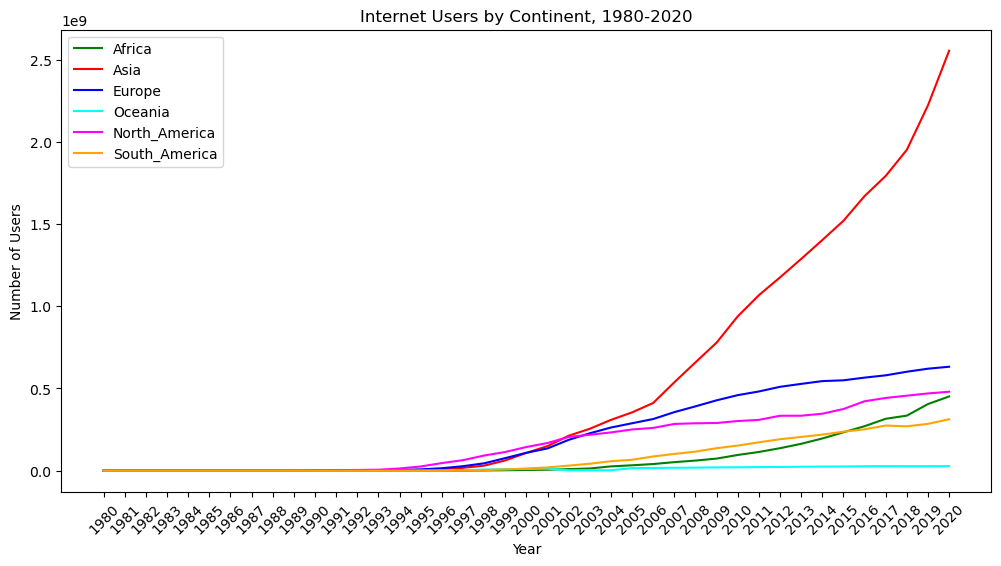

In [71]:
# Plot number of internet users by continent from 1980 to 2020

#date_range
date_range = list(range(1980,2021))

num_users_continent.plot(kind='line', figsize=(12,6), color=['green','red','blue','cyan','magenta','orange'])
plt.title('Internet Users by Continent, 1980-2020')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.xticks(ticks=date_range, rotation=45)
plt.show()

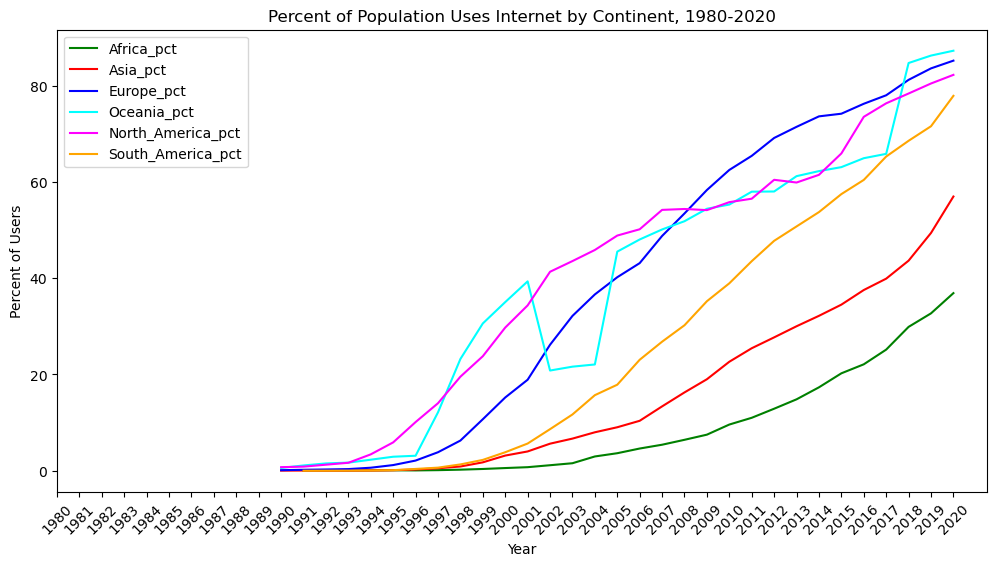

In [72]:
# Plot percent of internet users by continent from 1980 to 2020 
# Oceania data disjoineted due to missing data for several island nations

pct_continent.plot(kind='line', figsize=(12,6), color=['green','red','blue','cyan','magenta','orange'])
plt.title('Percent of Population Uses Internet by Continent, 1980-2020')
plt.xlabel('Year')
plt.ylabel('Percent of Users')
plt.xticks(ticks=date_range, rotation=45)
plt.show()

In [76]:
# List estimated population by continent in 2020

pop_continent_2020 = pop_continent.loc[2020]
pop_continent_2020.sort_values(ascending=False, inplace=True)
pop_continent_2020

Asia_est_pop             4.482693e+09
Africa_est_pop           1.224073e+09
Europe_est_pop           7.421792e+08
North_America_est_pop    5.840962e+08
South_America_est_pop    4.019477e+08
Oceania_est_pop          3.215765e+07
Name: 2020, dtype: float64

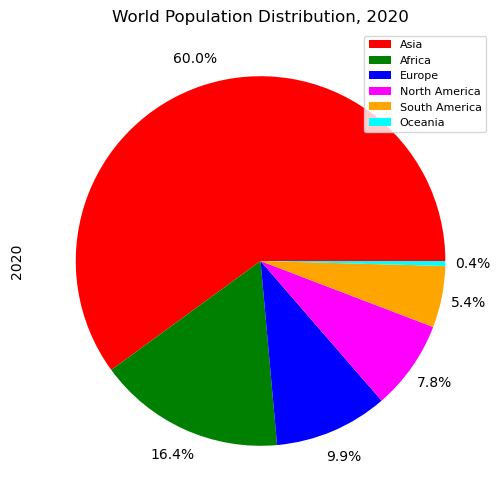

In [77]:
pop_continent_2020.plot(kind='pie', figsize=(12,6), autopct='%1.1f%%', pctdistance=1.15, labels=None,
                        colors=['red','green','blue','magenta','orange','cyan'])
plt.title('World Population Distribution, 2020')
#plt.legend(labels=pop_continent_2020.index, loc='lower left', fontsize=8)
plt.legend(labels=['Asia','Africa','Europe','North America','South America','Oceania'], loc='upper right', fontsize=8)
plt.show()


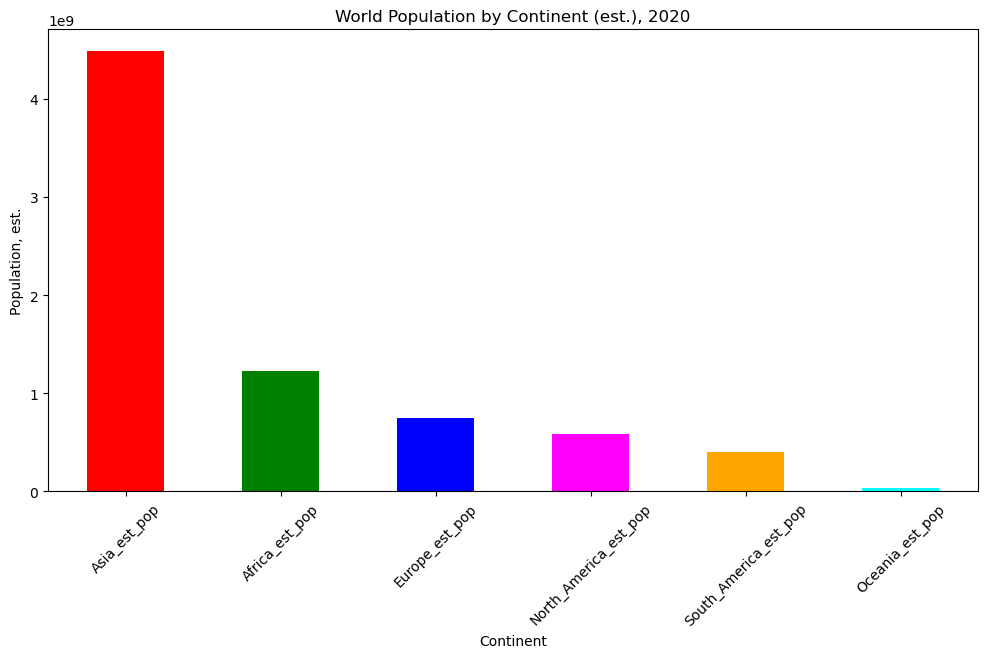

In [78]:
pop_continent_2020.plot(kind='bar', figsize=(12,6), color=['red','green','blue','magenta','orange','cyan'])
plt.title('World Population by Continent (est.), 2020')
plt.xlabel('Continent')
plt.ylabel('Population, est.')
plt.xticks(rotation=45)
plt.show()

In [79]:
# Which countries in Asia lead internet usage by percent in 2017?  (2017 is last year with complete sets of data
# for most countries)

internet_users_asia.loc[internet_users_asia['Year']==2017,:].sort_values(by=['Internet Users(%)'], ascending=False).head(15)

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,Continent,Population,longitude,latitude
4047,Kuwait,KWT,2017,176.002441,97.999992,4042406,2.902271,AS,4124904.0,29.311660,47.481766
6158,Qatar,QAT,2017,146.383865,97.388847,2640956,9.415986,AS,2711764.0,25.354826,51.183884
578,Bahrain,BHR,2017,158.256805,95.878136,1396795,12.995523,AS,1456844.0,26.066700,50.557700
6954,South Korea,KOR,2017,124.585426,95.069420,48971817,41.482201,AS,51511640.0,35.907757,127.766922
1129,Brunei,BRN,2017,128.331360,94.866692,408202,9.675999,AS,430290.0,4.535277,114.727669
7816,United Arab Emirates,ARE,2017,208.978607,94.819923,8598552,29.111109,AS,9068297.0,23.424076,53.847818
6535,Saudi Arabia,SAU,2017,121.478950,94.175598,32201575,20.099861,AS,34193120.0,23.885942,45.079162
3842,Japan,JPN,2017,135.518662,91.726547,116183105,31.789490,AS,126662464.0,36.204824,138.252924
3401,Hong Kong,HKG,2017,251.764999,89.415947,6671778,36.380383,AS,7461508.0,22.396428,114.109497
6709,Singapore,SGP,2017,146.843719,84.452271,4868242,25.853003,AS,5764489.0,1.352083,103.819836


In [80]:
top10_internet_users_asia = internet_users_asia.loc[(internet_users_asia['Code']=='KWT')|
                        (internet_users_asia['Code']=='QAT')|
                        (internet_users_asia['Code']=='BHR')|
                        (internet_users_asia['Code']=='KOR')|
                        (internet_users_asia['Code']=='BRN')|
                        (internet_users_asia['Code']=='ARE')|
                        (internet_users_asia['Code']=='SAU')|
                        (internet_users_asia['Code']=='JPN')|
                        (internet_users_asia['Code']=='HKG')|
                        (internet_users_asia['Code']=='SGP')
                        ,:]

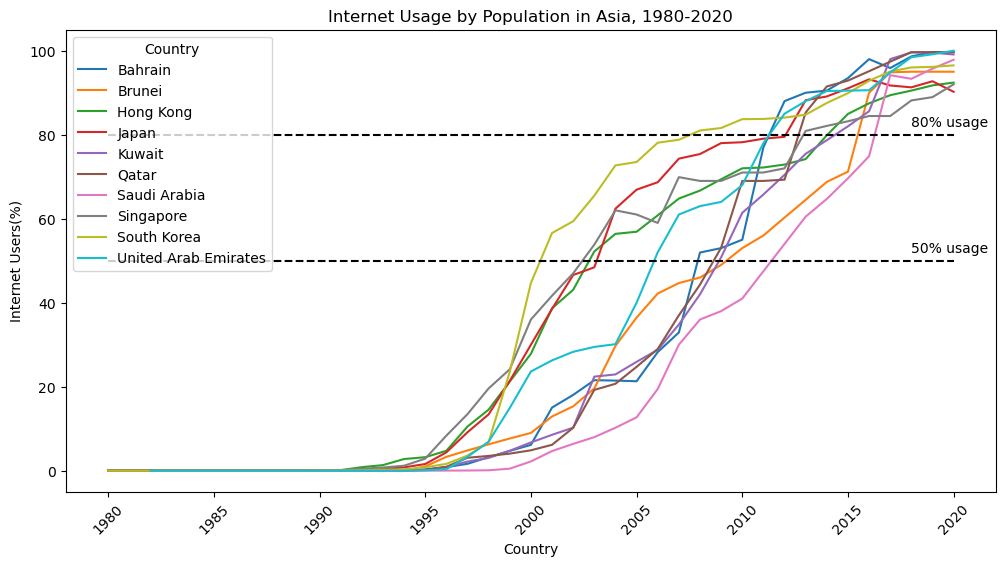

In [81]:
# Plot 10 countries with highest percent internet usage in Asia from 1980-2020 

plt.figure(figsize=(12,6))
sns.lineplot(data=top10_internet_users_asia, x='Year',y='Internet Users(%)', hue='Country')
plt.title('Internet Usage by Population in Asia, 1980-2020')
plt.xlabel('Country')
plt.ylabel('Internet Users(%)')
plt.hlines(50,1980,2020,colors='black', linestyles='dashed')
plt.hlines(80,1980,2020,colors='black', linestyles='dashed')
plt.text(2018, 52, '50% usage')
plt.text(2018, 82, '80% usage')
plt.xticks(rotation=45)
plt.show()

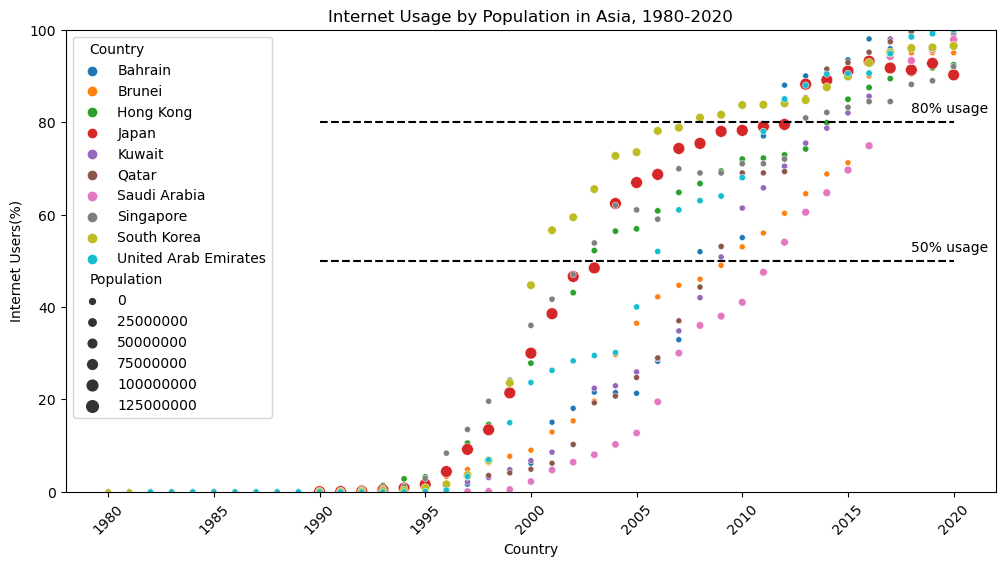

In [83]:
# Plot 10 countries with highest percent internet usage in Asia from 1980-2020 as bubble plot to include population info

plt.figure(figsize=(12,6))
sns.scatterplot(data=top10_internet_users_asia, x='Year',y='Internet Users(%)', hue='Country', size='Population')
plt.title('Internet Usage by Population in Asia, 1980-2020')
plt.xlabel('Country')
plt.ylabel('Internet Users(%)')
plt.hlines(50,1990,2020,colors='black', linestyles='dashed')
plt.hlines(80,1990,2020,colors='black', linestyles='dashed')
plt.text(2018, 52, '50% usage')
plt.text(2018, 82, '80% usage')
plt.xticks(rotation=45)
plt.ylim(0,100)
plt.show()

In [84]:
# Which countries in Africa lead internet usage by percent in 2017?  (2017 is last year with complete sets of data
# for most countries)

internet_users_africa.loc[internet_users_africa['Year']==2017,:].sort_values(by=['Internet Users(%)'], ascending=False).head(15)

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,Continent,Population,longitude,latitude
5098,Morocco,MAR,2017,123.424728,61.762211,21942950,3.875262,AF,35528116.0,31.791702,-7.092620
6634,Seychelles,SYC,2017,173.496643,58.769810,59844,15.786471,AF,101828.0,-4.679574,55.491977
1416,Cape Verde,CPV,2017,113.909073,57.162148,322943,2.789406,AF,564960.0,16.538800,-23.041800
6915,South Africa,ZAF,2017,155.232391,56.167393,31813890,1.970170,AF,56641208.0,-30.559482,22.937506
2116,Djibouti,DJI,2017,39.514076,55.681408,579221,2.583310,AF,1040241.0,11.825138,42.590275
7553,Tunisia,TUN,2017,125.369759,55.500156,6555368,7.012630,AF,11811441.0,33.886917,9.537499
4837,Mauritius,MUS,2017,145.472641,55.403240,717330,19.454346,AF,1294744.0,-20.348404,57.552152
2765,Gabon,GAB,2017,128.981659,50.320122,1076964,0.714202,AF,2140225.0,-0.803689,11.609444
119,Algeria,DZA,2017,110.767250,47.691055,19618454,7.756294,AF,41136548.0,28.033886,1.659626
2277,Egypt,EGY,2017,106.755936,44.950203,45754535,5.426930,AF,101789385.0,26.820553,30.802498


In [85]:
top10_internet_users_africa = internet_users_africa.loc[(internet_users_africa['Code']=='MAR')|
                        (internet_users_africa['Code']=='SYC')|
                        (internet_users_africa['Code']=='CPV')|
                        (internet_users_africa['Code']=='ZAF')|
                        (internet_users_africa['Code']=='DJI')|
                        (internet_users_africa['Code']=='TUN')|
                        (internet_users_africa['Code']=='MUS')|
                        (internet_users_africa['Code']=='GAB')|
                        (internet_users_africa['Code']=='DZA')|
                        (internet_users_africa['Code']=='EGY')
                        ,:]

In [86]:
top10_internet_users_africa

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,Continent,Population,longitude,latitude
82,Algeria,DZA,1980,0.000000,0.000000,0,0.000000,AF,0.0,28.033886,1.659626
83,Algeria,DZA,1981,0.000000,0.000000,0,0.000000,AF,0.0,28.033886,1.659626
84,Algeria,DZA,1982,0.000000,0.000000,0,0.000000,AF,0.0,28.033886,1.659626
85,Algeria,DZA,1983,0.000000,0.000000,0,0.000000,AF,0.0,28.033886,1.659626
86,Algeria,DZA,1984,0.000000,0.000000,0,0.000000,AF,0.0,28.033886,1.659626
...,...,...,...,...,...,...,...,...,...,...,...
7552,Tunisia,TUN,2016,126.345962,49.599995,5796090,5.664102,AF,11685667.0,33.886917,9.537499
7553,Tunisia,TUN,2017,125.369759,55.500156,6555368,7.012630,AF,11811441.0,33.886917,9.537499
7554,Tunisia,TUN,2018,127.707199,64.190811,7659915,8.767776,AF,11933040.0,33.886917,9.537499
7555,Tunisia,TUN,2019,126.305283,66.699997,8036895,10.183682,AF,12049318.0,33.886917,9.537499


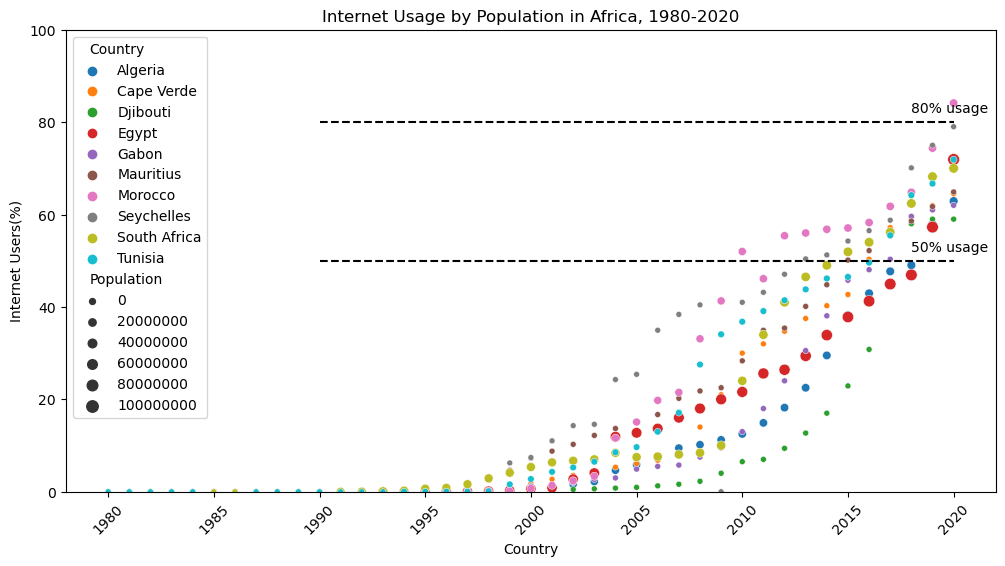

In [138]:
# Plot 10 countries with highest percent internet usage in Africa from 1980-2020 as bubble plot to include population info

plt.figure(figsize=(12,6))
sns.scatterplot(data=top10_internet_users_africa, x='Year',y='Internet Users(%)', hue='Country', size='Population')
plt.title('Internet Usage by Population in Africa, 1980-2020')
plt.xlabel('Country')
plt.ylabel('Internet Users(%)')
plt.hlines(50,1990,2020,colors='black', linestyles='dashed')
plt.hlines(80,1990,2020,colors='black', linestyles='dashed')
plt.text(2018, 52, '50% usage')
plt.text(2018, 82, '80% usage')
plt.xticks(rotation=45)
plt.ylim(0,100)
plt.show()

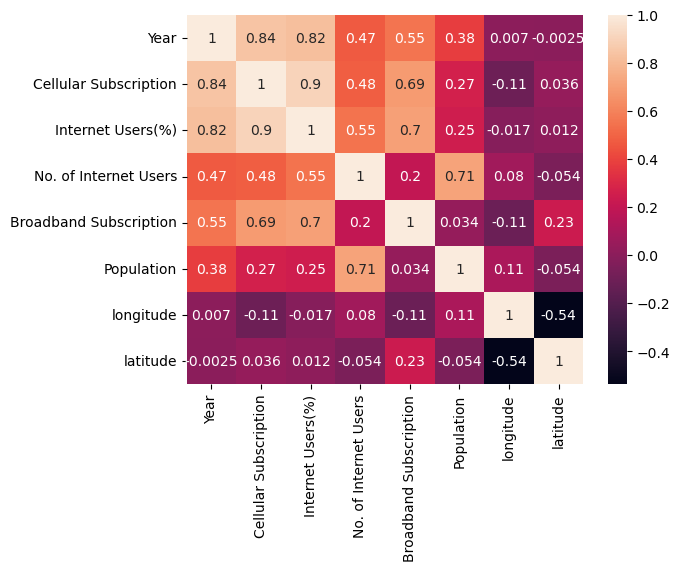

In [87]:
# Does percent usage in Africa correlate to broadband or cellular subscriptions?

sns.heatmap(top10_internet_users_africa.corr(numeric_only=True), annot=True)
plt.show()

# Stronger correlation between cellular subscription and percent of internet users than broadband subscriptions in Africa

In [89]:
internet_users.to_csv(r'C:\Users\datri\OneDrive\resume\Portfolio Project\global_internet_usage\global_internet_users_1980_2020.csv')

In [90]:
users_by_continent.to_csv(r'C:\Users\datri\OneDrive\resume\Portfolio Project\global_internet_usage\internet_users_by_continent_1980_2020.csv')